<a href="https://colab.research.google.com/github/SeounghwanPark/nesaram/blob/main/%EC%9D%BC%EC%A0%95%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8%EA%B5%AC%EC%B6%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("project_schedule1.csv")

# 데이터 미리보기
print(df.head())

In [ ]:
# 데이터 타입 확인
print(df.info())

# 결측치 확인
print(df.isnull().sum())

In [ ]:
# 분석에 필요 없는 컬럼 삭제
df = df[['Activity_ID', 'Start_Date', 'Finish_Date', 'Planned_Finish', 'Actual_Finish', 'Status']]

In [ ]:
# 날짜 컬럼을 datetime 형식으로 변환
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Finish_Date'] = pd.to_datetime(df['Finish_Date'])
df['Planned_Finish'] = pd.to_datetime(df['Planned_Finish'])
df['Actual_Finish'] = pd.to_datetime(df['Actual_Finish'])

In [ ]:
# 일정 지연 일수 계산
df['Delay_Days'] = (df['Actual_Finish'] - df['Planned_Finish']).dt.days
df['Delay_Flag'] = df['Delay_Days'].apply(lambda x: 1 if x > 0 else 0)  # 지연 여부 (1: 지연, 0: 정상)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Delay_Days'], bins=30, kde=True)
plt.title("일정 지연 분포")
plt.xlabel("지연 일수")
plt.ylabel("빈도수")
plt.show()

In [ ]:
df['Month'] = df['Planned_Finish'].dt.to_period('M')

# 월별 평균 지연 일수 계산
monthly_delay = df.groupby('Month')['Delay_Days'].mean()

plt.figure(figsize=(12, 5))
monthly_delay.plot(kind='bar')
plt.title("월별 평균 일정 지연")
plt.xlabel("월")
plt.ylabel("평균 지연 일수")
plt.show()

In [ ]:
# 1: 머신러닝을 위한 데이터 준비
from sklearn.model_selection import train_test_split

# Feature & Target 설정
X = df[['Start_Date', 'Planned_Finish']]  # 독립변수
y = df['Delay_Flag']  # 목표 변수 (지연 여부 예측)

# 날짜를 숫자로 변환
X['Start_Date'] = X['Start_Date'].astype('int64') // 10**9
X['Planned_Finish'] = X['Planned_Finish'].astype('int64') // 10**9

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2: 랜덤 포레스트 모델 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
print("정확도:", accuracy_score(y_test, y_pred))

In [ ]:
# 시계열 분석을 활용한 일정 지연 예측 (ARIMA, Prophet)
# 1: ARIMA 모델 학습
from statsmodels.tsa.arima.model import ARIMA

# 시계열 데이터 준비
ts_data = df.groupby('Planned_Finish')['Delay_Days'].mean()

# ARIMA 모델 학습
model = ARIMA(ts_data, order=(1,1,1))
model_fit = model.fit()

# 예측
forecast = model_fit.forecast(steps=10)
print(forecast)

In [ ]:
# 2: Prophet 모델 학습
from prophet import Prophet

# Prophet 데이터 준비
prophet_df = df[['Planned_Finish', 'Delay_Days']].rename(columns={'Planned_Finish': 'ds', 'Delay_Days': 'y'})

# 모델 학습
model = Prophet()
model.fit(prophet_df)

# 예측
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 결과 시각화
model.plot(forecast)
plt.show()

초기 구글 코렙으로 작업시 마운트 후 확인하기

새로운 폴더를 만들어줬을경우 아래작업 필요
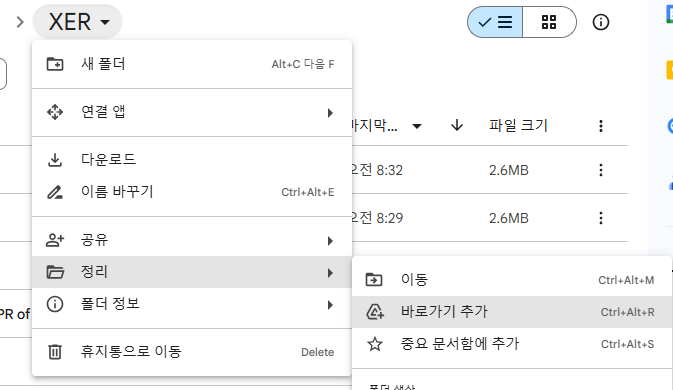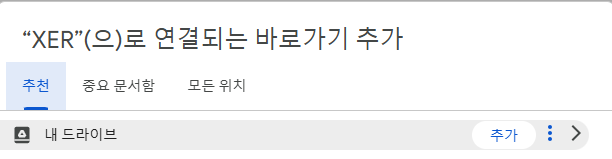


In [10]:
from google.colab import drive
drive.mount('/content/drive')
# Google Drive가 제대로 마운트되었는지 확인
!ls /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive


In [11]:
import os

# XER 파일이 저장된 폴더 경로
xer_directory = "/content/drive/MyDrive/XER"

# 폴더 내 파일 리스트 확인
if os.path.exists(xer_directory):
    print("XER 폴더 내 파일 목록:")
    for file in os.listdir(xer_directory):
        print(file)  # 파일명을 하나씩 출력
else:
    print("XER 폴더가 존재하지 않습니다. Google Drive 마운트 여부를 확인하세요.")

XER 폴더 내 파일 목록:
MPR13-1.xer
0407.xer
VP1_L4 Sch_0707.xer
VP1-C-EPC-G-GEN-00005 Project Schedule (MPR of Feb-23).xer
A2 Base Line 04 march 2017.xer
PKLI_Preliminary Schedule_rev.A.xer
A2 Actual update 04 march 2017.xer


In [13]:
# XER 파일을 특정 구분자를 기준으로 읽어서 Pandas에서 처리
import pandas as pd

# XER 파일 경로 설정
xer_file_path = "/content/drive/MyDrive/XER/A2 Base Line 04 march 2017.xer"

# 'latin1' 인코딩으로 파일 읽기
with open(xer_file_path, "r", encoding="latin1") as file:
    lines = file.readlines()

# 데이터 확인 (처음 몇 줄 출력)
for i in range(10):
    print(lines[i])  # XER 파일의 구조 확인

# 특정 구분자를 기준으로 데이터프레임으로 변환 (예: 탭으로 구분)
df = pd.DataFrame([line.strip().split("\t") for line in lines])

# CSV로 저장
csv_file_path = "/content/drive/MyDrive/XER/A2_Base_Line_04_March_2017.csv"
df.to_csv(csv_file_path, index=False)

print("XER 파일을 CSV로 변환 완료:", csv_file_path)

ERMHDR	6.1	2017-04-05	Project	admin	uni build	dbxDatabaseNoName	Project Management	PKR

%T	CURRTYPE

%F	curr_id	decimal_digit_cnt	curr_symbol	decimal_symbol	digit_group_symbol	pos_curr_fmt_type	neg_curr_fmt_type	curr_type	curr_short_name	group_digit_cnt	base_exch_rate

%R	1	2	$	.	,	#1.1	(#1.1)	US Dollar	USD	3	1

%R	13	2	£	.	,	#1.1	(#1.1)	Pound Sterling	GBP	3	0.618603

%R	14	2	¥	.	,	#1.1	(#1.1)	Japanese Yen	JPY	3	91.2708

%R	15	2		.	,	#1.1	(#1.1)	Euro	EUR	3	0.689711

%R	16	2	¥	.	,	#1.1	(#1.1)	Chinese Yuan Renminbi	CNY	3	6.82502

%R	17	2	$	.	,	#1.1	(#1.1)	Canadian Dollar	CAD	3	1.03757

%R	18	2	RUB	.	,	#1.1	(#1.1)	Russian Ruble	RUB	3	0.033948

XER 파일을 CSV로 변환 완료: /content/drive/MyDrive/XER/A2_Base_Line_04_March_2017.csv


In [14]:
# 다른 방법 시행
# XER 파일 경로 설정
xer_file_path = "/content/drive/MyDrive/XER/A2 Base Line 04 march 2017.xer"

# UTF-8 인코딩 사용, 오류 발생 시 대체 문자로 처리
with open(xer_file_path, "r", encoding="utf-8", errors="replace") as file:
    lines = file.readlines()

# 데이터 확인 (처음 몇 줄 출력)
for i in range(10):
    print(lines[i])  # XER 파일의 구조 확인

# 특정 구분자를 기준으로 데이터프레임으로 변환 (예: 탭으로 구분)
df = pd.DataFrame([line.strip().split("\t") for line in lines])

# CSV로 저장
csv_file_path = "/content/drive/MyDrive/XER/A2_Base_Line_04_March_2017_02.csv"
df.to_csv(csv_file_path, index=False)

print("XER 파일을 CSV로 변환 완료:", csv_file_path)

ERMHDR	6.1	2017-04-05	Project	admin	uni build	dbxDatabaseNoName	Project Management	PKR

%T	CURRTYPE

%F	curr_id	decimal_digit_cnt	curr_symbol	decimal_symbol	digit_group_symbol	pos_curr_fmt_type	neg_curr_fmt_type	curr_type	curr_short_name	group_digit_cnt	base_exch_rate

%R	1	2	$	.	,	#1.1	(#1.1)	US Dollar	USD	3	1

%R	13	2	�	.	,	#1.1	(#1.1)	Pound Sterling	GBP	3	0.618603

%R	14	2	�	.	,	#1.1	(#1.1)	Japanese Yen	JPY	3	91.2708

%R	15	2	�	.	,	#1.1	(#1.1)	Euro	EUR	3	0.689711

%R	16	2	�	.	,	#1.1	(#1.1)	Chinese Yuan Renminbi	CNY	3	6.82502

%R	17	2	$	.	,	#1.1	(#1.1)	Canadian Dollar	CAD	3	1.03757

%R	18	2	RUB	.	,	#1.1	(#1.1)	Russian Ruble	RUB	3	0.033948

XER 파일을 CSV로 변환 완료: /content/drive/MyDrive/XER/A2_Base_Line_04_March_2017_02.csv


In [15]:
# CSV 파일 경로
csv_file_path = "/content/drive/MyDrive/XER/A2_Base_Line_04_March_2017_02.csv"

# CSV 파일 읽기 (기본 인코딩은 utf-8)
df = pd.read_csv(csv_file_path)

# DataFrame의 상위 5개 행 출력하여 데이터 확인
print(df.head())

        0         1                  2            3               4  \
0  ERMHDR       6.1         2017-04-05      Project           admin   
1      %T  CURRTYPE                NaN          NaN             NaN   
2      %F   curr_id  decimal_digit_cnt  curr_symbol  decimal_symbol   
3      %R         1                  2            $               .   
4      %R        13                  2            �               .   

                    5                  6                   7               8  \
0           uni build  dbxDatabaseNoName  Project Management             PKR   
1                 NaN                NaN                 NaN             NaN   
2  digit_group_symbol  pos_curr_fmt_type   neg_curr_fmt_type       curr_type   
3                   ,               #1.1              (#1.1)       US Dollar   
4                   ,               #1.1              (#1.1)  Pound Sterling   

                 9  ...   59   60   61   62   63   64   65   66   67   68  
0              N

<ipython-input-15-fed16426015c>:5: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,33,34,35,39,40,41,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


첫 번째 코드 (print(df.head())):

파이썬의 내장 함수인 print()를 사용하여 DataFrame의 상위 5개 행을 텍스트 형태로 출력합니다.

결과가 단순한 텍스트 문자열로 나타나기 때문에 가독성이 떨어질 수 있습니다.

두 번째 코드 (display(df.head())):

IPython의 display() 함수를 사용하여 DataFrame의 상위 5개 행을 출력합니다.

Jupyter Notebook이나 Colab과 같은 환경에서 실행하면, HTML 형식의 표로 예쁘게 렌더링되어 보여집니다.

데이터프레임의 컬럼과 행이 잘 정렬되어 출력되어 가독성이 좋습니다.

In [16]:
import pandas as pd
from IPython.display import display

# CSV 파일 경로 설정
csv_file_path = "/content/drive/MyDrive/XER/A2_Base_Line_04_March_2017_02.csv"

# CSV 파일을 DataFrame으로 읽기
df = pd.read_csv(csv_file_path)

# DataFrame을 출력하여 확인 (Jupyter/Colab 환경에서 표 형태로 보여짐)
display(df.head())  # 상위 5개 행 출력

<ipython-input-16-aec08de8bb31>:8: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,33,34,35,39,40,41,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,ERMHDR,6.1,2017-04-05,Project,admin,uni build,dbxDatabaseNoName,Project Management,PKR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,%T,CURRTYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,%F,curr_id,decimal_digit_cnt,curr_symbol,decimal_symbol,digit_group_symbol,pos_curr_fmt_type,neg_curr_fmt_type,curr_type,curr_short_name,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,%R,1,2,$,.,",",#1.1,(#1.1),US Dollar,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,%R,13,2,�,.,",",#1.1,(#1.1),Pound Sterling,GBP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
